In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df=pd.read_csv('../../research/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
df.shape

(7043, 21)

In [85]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*  customerID: Unique identifier for each customer.
*  gender: Gender of the customer (male or female).
* SeniorCitizen: Indicates if the customer is a senior citizen (1 for Yes, 0 for No).
* Partner: Indicates if the customer has a partner (Yes or No).
* Dependents: Indicates if the customer has dependents (Yes or No).
* tenure: Number of months the customer has stayed with the company.
* PhoneService: Indicates if the customer has phone service (Yes or No).
* MultipleLines: Indicates if the customer has multiple phone lines (Yes, No, or No phone service).
* InternetService: Type of internet service the customer has (DSL, Fiber optic, or No).
* OnlineSecurity: Indicates if the customer has online security service (Yes, No, or No internet service).
* OnlineBackup: Indicates if the customer has online backup service (Yes, No, or No internet service).
* DeviceProtection: Indicates if the customer has device protection plan (Yes, No, or No internet service).
* TechSupport: Indicates if the customer has tech support service (Yes, No, or No internet service).
* StreamingTV: Indicates if the customer has streaming TV service (Yes, No, or No internet service).
* StreamingMovies: Indicates if the customer has streaming movies service (Yes, No, or No internet service).
* Contract: Type of contract the customer has (Month-to-month, One year, or Two year).
* PaperlessBilling: Indicates if the customer uses paperless billing (Yes or No).
* PaymentMethod: Payment method used by the customer (Electronic check, Mailed check, Bank transfer, or Credit card).
* MonthlyCharges: Monthly charges incurred by the customer.
* TotalCharges: Total charges incurred by the customer.
* Churn: Indicates if the customer has churned (Yes or No).

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


* Insight
* Senior Citizens: Most customers are not senior citizens.

* Tenure: 75% of customers have been with the company for less than 55 months.

* Outliers: The mean and median for tenure and monthly charges are close, so there likely aren't any extreme values (outliers). However, using a boxplot can confirm this.

* Monthly Charges: The average monthly charge for customers is about 64.76 USD.

In [88]:
(df['Churn'].value_counts())/df.shape[0]*100 # percentage of chunn factor

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

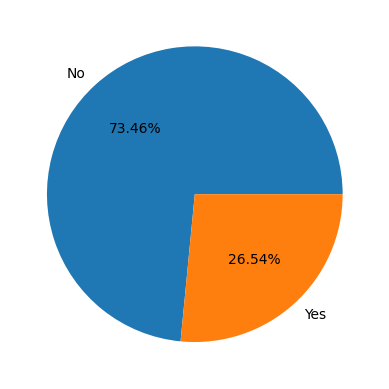

In [89]:
plt.pie(x=df['Churn'].value_counts(),labels=df['Churn'].value_counts().index,autopct='%.02f%%')
plt.show()

Insight
* Data Imbalance: The data has a highly imbalanced ratio of 73:27 (No:Yes).
* Separate Analysis: Analyze the data separately to gain more specific insights.
* Handling Imbalance in Model Building: Use SMOTE (Synthetic Minority Over-sampling Technique) to address the data imbalance during model building.

In [90]:
missing=(((df.isna().sum())*100)/df.shape[0]).reset_index()

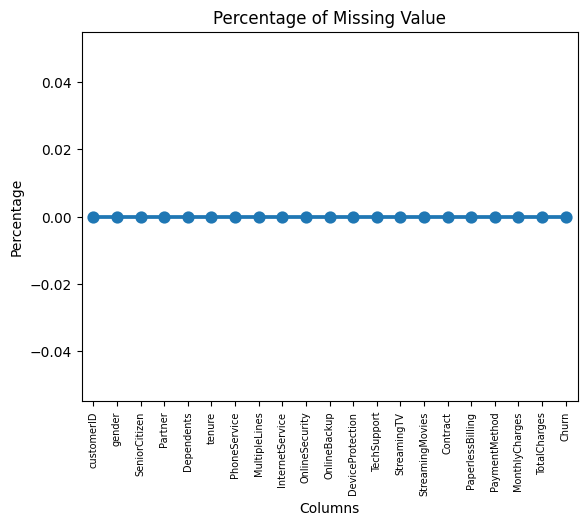

In [91]:
sns.pointplot(data=missing,x='index',y=0)
plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage of Missing Value")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

In [92]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [93]:
missing_total_charge=(((df.isnull().sum())*100)/df.shape[0]).reset_index()

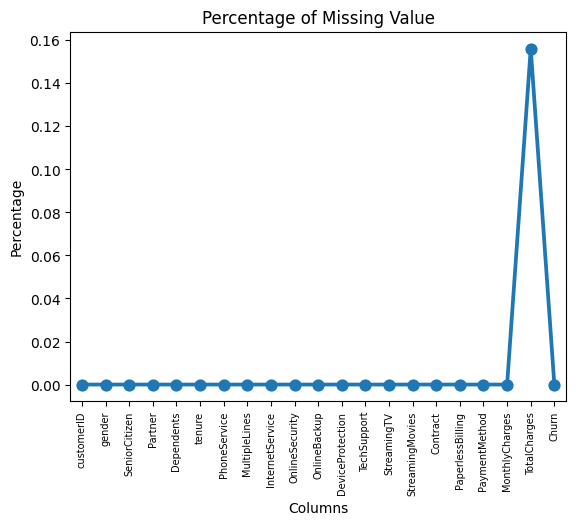

In [94]:
sns.pointplot(data=missing_total_charge,x='index',y=0)
plt.xticks(rotation=90,fontsize=7)
plt.title("Percentage of Missing Value")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

In [95]:
df.loc[df['TotalCharges'].isnull()==True]
# those 11 null values TotalCharges columns

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [96]:
df.dropna(how='any',inplace=True)

In [97]:
df['TotalCharges'].isna().sum()

0

In [98]:
df['tenure'].max()

72

In [99]:
labels = ['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['tenure_group']=pd.cut(df['tenure'],bins=range(1,80,12),labels=labels,right=False)


In [100]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

In [101]:
# Going to drop tenure & customerID columns
df.drop(columns=['customerID','tenure'],axis=1,inplace=True)


In [102]:
categorical_columns = df.select_dtypes(include=['object','category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int','float']).columns.tolist()


In [103]:
categorical_columns.append('SeniorCitizen')
numerical_columns.remove('SeniorCitizen')

In [104]:
len(categorical_columns) 

18

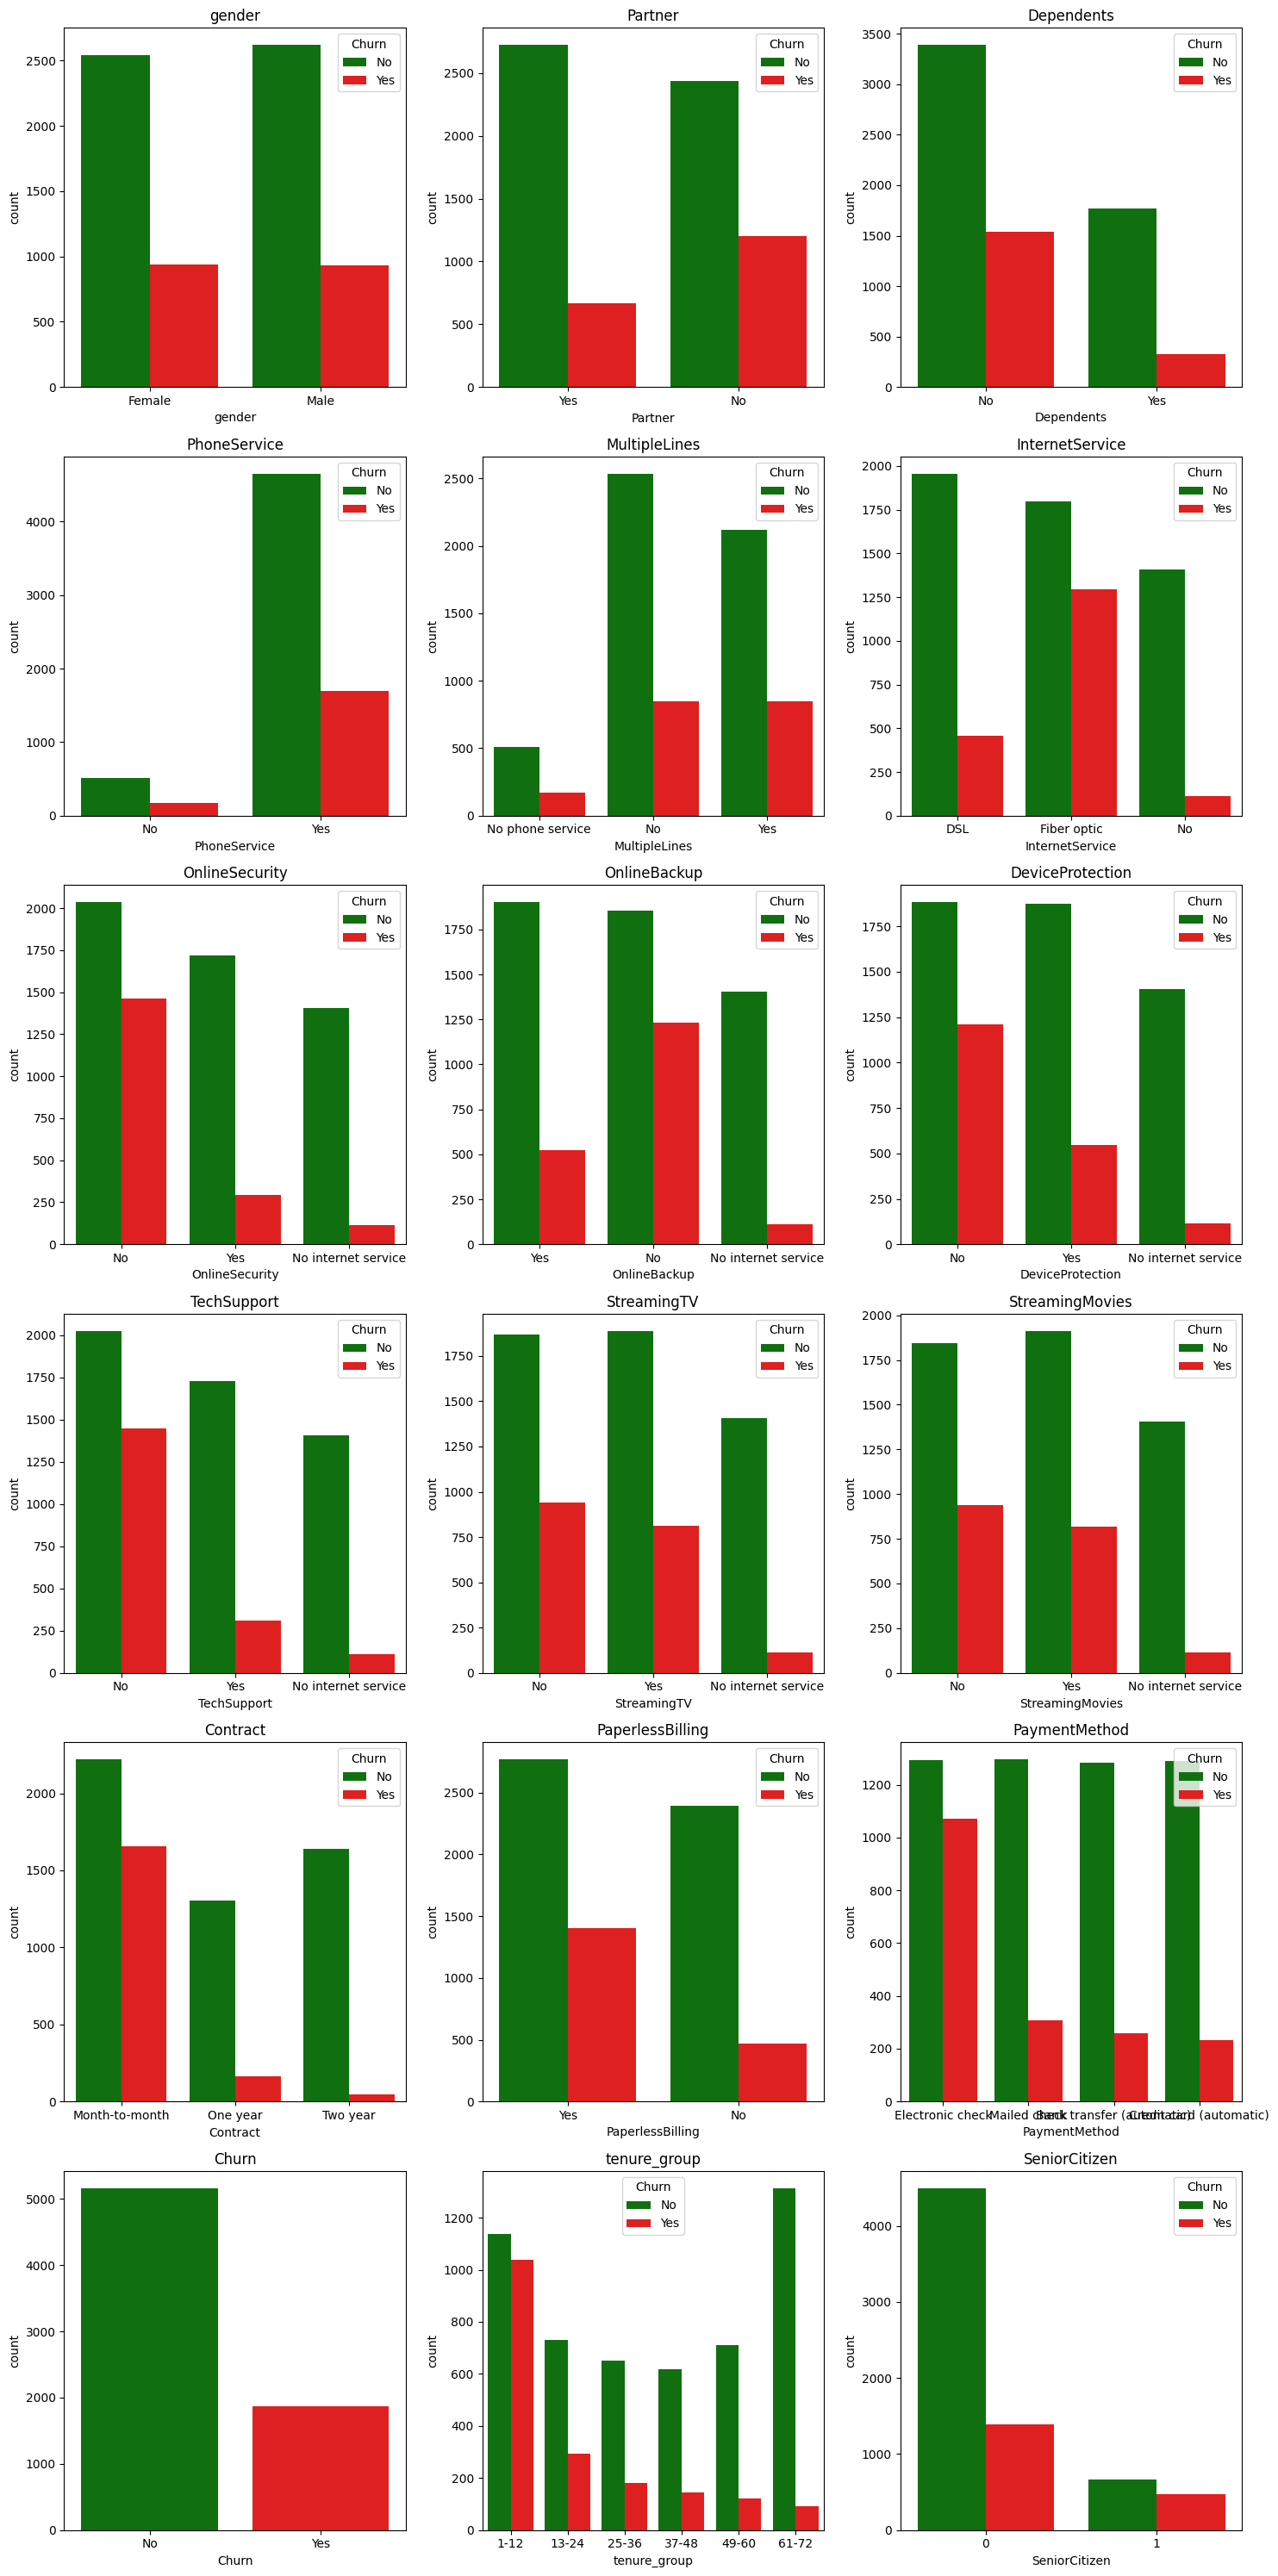

In [105]:
cols=3
rows=6
fig,axes=plt.subplots(nrows=rows,ncols=cols,figsize=(15,rows*5))
axes=axes.flatten()
custom_palette={'Yes':'red','No':'green'}

for i,column in zip(axes,categorical_columns):
    sns.countplot(x=column,hue='Churn',data=df,ax=i,palette=custom_palette)
    i.set_title(column)
    #i.set_xticklabels(i.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

Insights 🚀
Gender: 👫

The count of churn is similar between male and female customers.
A higher number of customers do not churn.
Partner: 💔

Customers without partners have a higher churn rate compared to those with partners.
Dependents: 👶

Customers with dependents are less likely to churn compared to those without dependents.
Phone Service: 📞

Customers with phone service have a higher churn rate compared to those without phone service.
Multiple Lines: 📱📱

Customers with multiple lines have a higher churn rate than those without multiple lines or with no phone service.
Internet Service: 🌐

Fiber optic users have a higher churn rate compared to DSL users and those with no internet service.
Online Security: 🔒

Customers without online security have a higher churn rate compared to those with online security or no internet service.
Online Backup: 💾

Customers without online backup have a higher churn rate compared to those with online backup or no internet service.
Device Protection: 🛡️

Customers without device protection have a higher churn rate compared to those with device protection or no internet service.
Tech Support: 🧑‍💻

Customers without tech support have a higher churn rate compared to those with tech support or no internet service.
Streaming TV: 📺

Customers who do not stream TV have a lower churn rate compared to those who do stream TV or have no internet service.
Streaming Movies: 🎬

Customers who do not stream movies have a lower churn rate compared to those who do stream movies or have no internet service.
Contract: 📄

Month-to-month contract customers have a significantly higher churn rate compared to those with one-year or two-year contracts.
Paperless Billing: 💻

Customers with paperless billing have a higher churn rate compared to those without paperless billing.
Payment Method: 💸

Electronic check customers have the highest churn rate, followed by mailed check, bank transfer (automatic), and credit card (automatic).
Churn: 🔄

The overall churn rate shows that most customers do not churn.
Tenure Group: 📆

Customers in the 1-12 month tenure group have the highest churn rate, which decreases with longer tenure groups.
Senior Citizen: 👴👵

Senior citizens have a lower number of churns overall compared to non-senior citizens.
However, when considering the proportion of senior citizens and non-senior citizens, senior citizens have a higher likelihood of churning. This suggests that senior citizens churn at a higher rate relative to their representation in the customer base.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


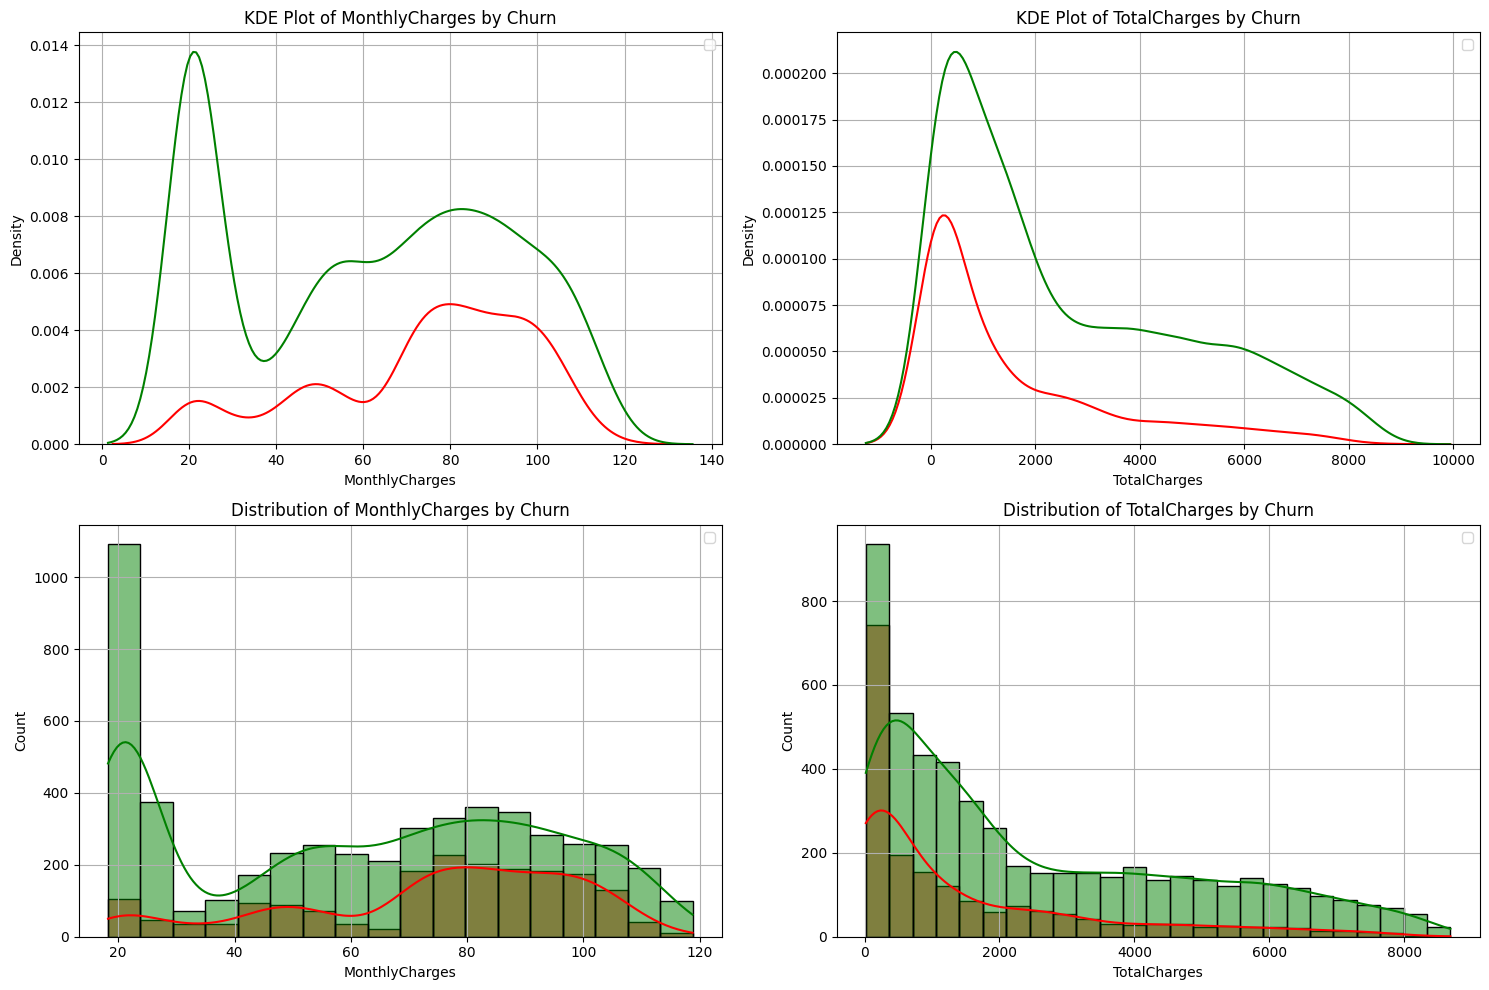

In [106]:
cols = 2
rows = 2
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 5))
axes = axes.flatten()
custom_palette = {'Yes': 'red', 'No': 'green'}
for i, col in enumerate(numerical_columns):
    # Plot KDE plot
    sns.kdeplot(data=df, x=col, hue='Churn', ax=axes[i], palette=custom_palette)
    axes[i].set_title(f'KDE Plot of {col} by Churn')
    axes[i].legend()
    axes[i].grid(True)

    # Plot histogram with KDE overlay
    sns.histplot(data=df, x=col, hue='Churn', ax=axes[i+cols], palette=custom_palette, kde=True)
    axes[i+cols].set_title(f'Distribution of {col} by Churn')
    axes[i+cols].legend()
    axes[i+cols].grid(True)

plt.tight_layout()
plt.show()

Insights
Monthly Charges:
Non-churned Customers (Green):
Most customers are paying around $20 per month.
There are also many customers paying between 
80 per month.
Churned Customers (Red):
Customers are more likely to leave if they are paying around 
100 per month.
Total Charges:
Non-churned Customers (Green):
Most customers have total charges less than $2,000.
Churned Customers (Red):
Customers with lower total charges (less than $2,000) are more likely to leave.
Note:Both Monthly Charges and Total Charges are right-skewed, applying a log transformation can help normalize the data.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

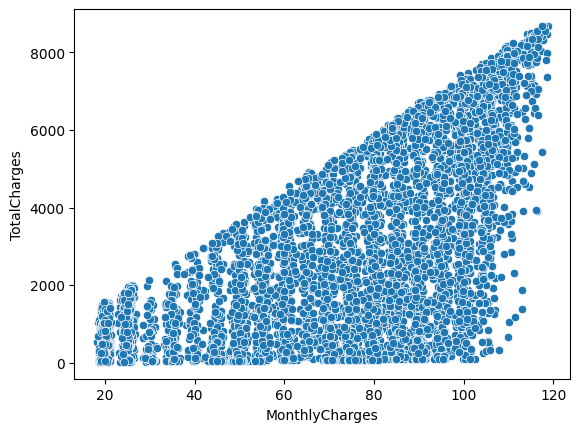

In [107]:
sns.scatterplot(data=df,x=numerical_columns[0],y=numerical_columns[1])

In [109]:
df[[numerical_columns[0],numerical_columns[1]]].corr()

,MonthlyCharges,TotalCharges
MonthlyCharges,1.000000,0.651065
TotalCharges,0.651065,1.000000


Monthly Charges and Total Charges are highly correlated, it makes sense to select only one of these variables for your analysis to avoid multicollinearity, which can negatively impact the performance and interpretability of statistical models.

In [110]:
df.drop(columns=['TotalCharges'],axis=1,inplace=True)


In [112]:
from scipy.stats import chi2_contingency
def chi_square_test( x1, x2):
    contingency_table = pd.crosstab(df[x1], df[x2])
    chi_sq_result = chi2_contingency(contingency_table)
    p_value = chi_sq_result[1]
    correlation = "Correlated" if p_value < 0.05 else "Not Correlated"
    return p_value, correlation

In [113]:
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            r=chi_square_test(col1, col2)
            if r[1]=='Correlated':
                print(f"Chi-square Test for {col1} and {col2}:")
                print(r)

Chi-square Test for Partner and Dependents:
(0.0, 'Correlated')
Chi-square Test for Partner and MultipleLines:
(1.598728280420032e-32, 'Correlated')
Chi-square Test for Partner and OnlineSecurity:
(5.7832861351856704e-36, 'Correlated')
Chi-square Test for Partner and OnlineBackup:
(1.2979922776669001e-36, 'Correlated')
Chi-square Test for Partner and DeviceProtection:
(9.364677583389403e-43, 'Correlated')
Chi-square Test for Partner and TechSupport:
(1.4901687562962913e-25, 'Correlated')
Chi-square Test for Partner and StreamingTV:
(2.9557190881420945e-29, 'Correlated')
Chi-square Test for Partner and StreamingMovies:
(1.6980728723707905e-26, 'Correlated')
Chi-square Test for Partner and Contract:
(6.569797961945938e-134, 'Correlated')
Chi-square Test for Partner and PaymentMethod:
(1.098559778101642e-40, 'Correlated')
Chi-square Test for Partner and Churn:
(3.97379757451591e-36, 'Correlated')
Chi-square Test for Partner and tenure_group:
(1.161283727493916e-210, 'Correlated')
Chi-squa

Strong Associations (Correlated):

Many pairs of variables show very low p-values (close to zero), indicating strong evidence against the null hypothesis of independence.
Examples include:
Partner and Dependents
Partner and MultipleLines
Partner and OnlineSecurity
Partner and Contract
PaymentMethod and InternetService
Churn and Contract
SeniorCitizen and InternetService
Moderate Associations (Potentially Correlated):

Some pairs have higher but still significant p-values, suggesting moderate evidence against the null hypothesis.
Examples include:
MultipleLines and Churn
Contract and SeniorCitizen
No Significant Associations:

Variables like PhoneService and MultipleLines show a p-value of 0.0, indicating a significant association, but this could also mean they are directly related in terms of service provision.
Based on the findings from the chi-square tests, here are the columns you should consider dropping for selecting the best features for model building, along with brief reasons:

MultipleLines

Strong association with PhoneService(p-value close to zero), indicating redundancy in information.
OnlineSecurity

Strong association with Partner (low p-value), suggesting correlated information.
InternetService

Strong association with PaymentMethod (low p-value), indicating overlap in predictive power.
Dependents

Strongly associated with Partner, indicating redundancy in predictive information.

<Axes: xlabel='Partner', ylabel='count'>

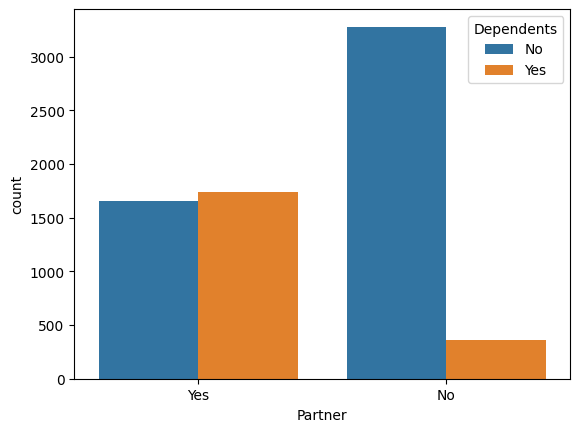

In [114]:
sns.countplot(x=df['Partner'],hue=df['Dependents'])


<Axes: xlabel='InternetService', ylabel='count'>

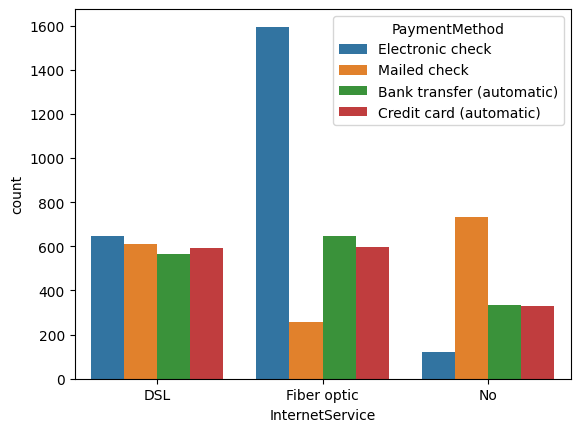

In [115]:
sns.countplot(x=df['InternetService'],hue=df['PaymentMethod'])


<Axes: xlabel='Partner', ylabel='count'>

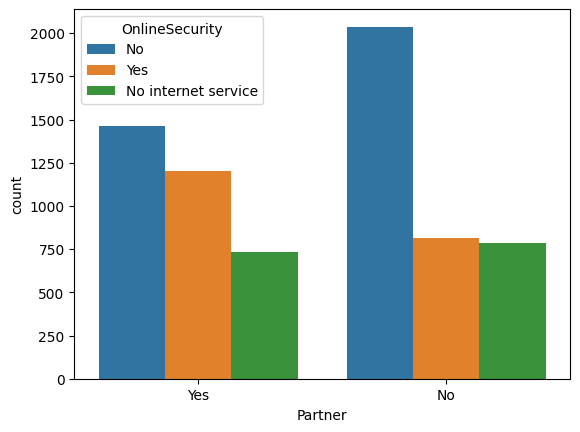

In [116]:
sns.countplot(x=df['Partner'],hue=df['OnlineSecurity'])


<Axes: xlabel='PhoneService', ylabel='count'>

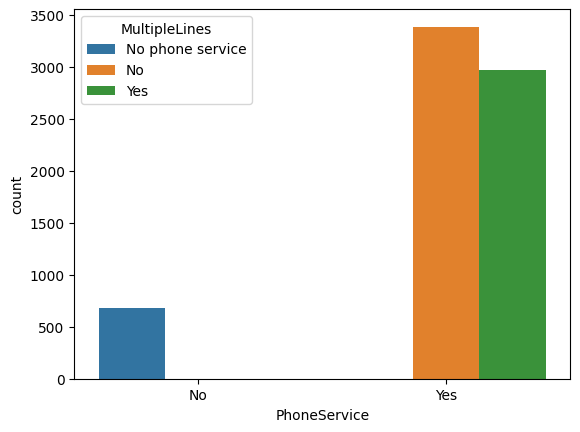

In [117]:
sns.countplot(x=df['PhoneService'],hue=df['MultipleLines'])


In [118]:
df.columns.__len__()


19

In [119]:
df.drop(columns=['MultipleLines','Dependents','InternetService','OnlineSecurity'],axis=1,inplace=True)


In [120]:
df.columns.__len__()


15

In [124]:
# We are taking the log values for Monthly Charges col
df['MonthlyCharges']=np.log(df['MonthlyCharges'] + 1)

In [125]:
X=df.drop('Churn' ,axis=1)
y=df['Churn'].map({'No': 0, 'Yes': 1})

In [126]:
categorical_columns = X.select_dtypes(include=['object','category']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int','float']).columns.tolist()

In [2]:
# Modelnumerical_columns Building
#numerical_columns

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    VotingClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
warnings.filterwarnings('ignore')

In [2]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Support Vector Machines (SVM)", SVC()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting Machines (XGBoost)", XGBClassifier()),
    ("K-Nearest Neighbors (KNN)", KNeighborsClassifier()),
    ("Decision Trees", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Extra Trees", ExtraTreesClassifier()),
    ("Ensemble Methods (AdaBoost)", AdaBoostClassifier()),
    (
        "Ensemble Methods (Voting Classifier)",
        VotingClassifier(
            estimators=[
                ("lr", LogisticRegression()),
                ("svm", SVC()),
                ("rf", RandomForestClassifier()),
            ]
        ),
    ),
    (
        "Ensemble Methods (Bagging)",
        BaggingClassifier(base_estimator=DecisionTreeClassifier()),
    ),
    ("Ensemble Methods (Gradient Boosting)", GradientBoostingClassifier()),
]

NameError: name 'LogisticRegression' is not defined

In [130]:
# Splitting data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [170]:
model_accuracy ={}
def evaluate_classification_model(model_name, preprocessor, smote, model, X_train, y_train, X_test, y_test):
    # Fit the preprocessor to the training data
    X_train_preprocessed = preprocessor.fit_transform(X_train, y_train)

    # Apply SMOTE to the preprocessed training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

    # Fit the model to the resampled data
    model.fit(X_train_resampled, y_train_resampled)

    # Predictions
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(preprocessor.transform(X_test))

    # Print training classification report and confusion matrix
    print(f"Training Report for {model_name}:")
    print(classification_report(y_train_resampled, y_train_pred))
    print(f"Training Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_train_resampled, y_train_pred))

    # Print testing classification report and confusion matrix
    print(f"Testing Report for {model_name}:")
    print(classification_report(y_test, y_test_pred))
    print(f"Testing Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_test_pred))
    # model_accuracy[model_name] =
    
    model_accuracy[model_name]=accuracy_score(y_test, y_test_pred)
    
    #print("kp",model_accuracy)

In [140]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'), categorical_columns),
])

In [171]:
smote = SMOTE(random_state=42)
for model_name, model in models:
    evaluate_classification_model(model_name, preprocessor, smote, model, X_train, y_train, X_test, y_test)

Training Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      4130
           1       0.75      0.81      0.78      4130

    accuracy                           0.77      8260
   macro avg       0.77      0.77      0.77      8260
weighted avg       0.77      0.77      0.77      8260

Training Confusion Matrix for Logistic Regression:
[[3016 1114]
 [ 796 3334]]
Testing Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.78      0.60       374

    accuracy                           0.73      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407

Testing Confusion Matrix for Logistic Regression:
[[734 299]
 [ 83 291]]
Training Report for Support Vector Machines (SVM):
              precision    recall  f1-score   support

        

In [146]:
# model_accuracy={}
# def abc(key,value):
#     model_accuracy[key]=value

# abc('Logistic Regression', 0.8091)

# abc('Support Vector Machines (SVM)', 0.8091)


{'Logistic Regression': 0.8091, 'Support Vector Machines (SVM)': 0.8091}

In [4]:
models = [
                ("Logistic Regression", LogisticRegression()),
                ("Support Vector Machines (SVM)", SVC()),
                ("Random Forest", RandomForestClassifier()),
                ("Gradient Boosting Machines (XGBoost)", XGBClassifier()),
                ("K-Nearest Neighbors (KNN)", KNeighborsClassifier()),
                ("Decision Trees", DecisionTreeClassifier()),
                ("Random Forest", RandomForestClassifier()),
                ("Extra Trees", ExtraTreesClassifier()),
                ("Ensemble Methods (AdaBoost)", AdaBoostClassifier()),
                (
                    "Ensemble Methods (Voting Classifier)",
                    VotingClassifier(
                        estimators=[
                            ("lr", LogisticRegression()),
                            ("svm", SVC()),
                            ("rf", RandomForestClassifier()),
                        ]
                    ),
                ),
                (
                    "Ensemble Methods (Bagging)",
                    BaggingClassifier(base_estimator=DecisionTreeClassifier()),
                ),
                ("Ensemble Methods (Gradient Boosting)", GradientBoostingClassifier()),
            ]
            

In [33]:

for i in range(len(models)):
    print(models[0]['Logistic Regression'])

TypeError: tuple indices must be integers or slices, not str

In [38]:
models[0][1]

LogisticRegression()

In [39]:
model_score={'Logistic Regression': 0.7716312056737589, 'Support Vector Machines (SVM)': 0.7843971631205674, 'Random Forest': 0.775886524822695, 'Gradient Boosting Machines (XGBoost)': 0.7801418439716312, 'K-Nearest Neighbors (KNN)': 0.7219858156028369, 'Decision Trees': 0.7191489361702128, 'Extra Trees': 0.7546099290780142, 'Ensemble Methods (AdaBoost)': 0.7815602836879433, 'Ensemble Methods (Voting Classifier)': 0.7914893617021277, 'Ensemble Methods (Bagging)': 0.7673758865248227, 'Ensemble Methods (Gradient Boosting)': 0.8042553191489362}

In [45]:
best_score=max(sorted(model_score.values()))
best_score

0.8042553191489362

In [82]:
#.index(best_score)mode
best_model_index=list(model_score.keys())[list(model_score.values()).index(best_score)]

In [83]:
best_model_index

'Ensemble Methods (Gradient Boosting)'

In [78]:
#
models[0]#[best_model]

('Logistic Regression', LogisticRegression())

In [84]:
best_model = None
for name, model in models:
    if name == best_model_index:
        best_model = model
        break

In [85]:
best_model

GradientBoostingClassifier()

In [2]:
import pandas as pd
df=pd.read_csv('../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.groupby('InternetService')['MonthlyCharges'].mean()

InternetService
DSL            58.102169
Fiber optic    91.500129
No             21.079194
Name: MonthlyCharges, dtype: float64

In [15]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64